Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from scipy import stats
from scipy.stats import t
import pandas as pd
import random
import math
from solution import solution
from WOA import WOA
from GWO import GWO
from FFA import FFA

Leitura do Dataset

In [2]:
data = pd.read_csv('data\File1_normalizado.csv', usecols=['Timestamp', 'ID', 'DLC', 'Class'])
data.sample(25)

,Timestamp,ID,DLC,Class
378444,1.000000,0.328285,1.000,0
742520,0.999999,0.531021,1.000,0
596794,0.999999,0.274548,1.000,0
427360,1.000000,0.194919,1.000,0
212329,1.000000,0.395213,1.000,0
368063,1.000000,0.148999,1.000,0
4735,0.999999,0.412311,1.000,0
798781,0.999999,0.586224,1.000,0
714680,0.999999,0.194919,1.000,0
270200,1.000000,0.297020,1.000,0


Média e Desvio Padrão das classes

In [16]:
grouped = data.groupby('Class')

mean = grouped[['Timestamp', 'ID', 'DLC']].mean()
std = grouped[['Timestamp', 'ID', 'DLC']].std()

print("Média:\n", mean)
print("\nDesvio Padrão:\n", std)

Média:
        Timestamp        ID       DLC
Class                               
0       0.999999  0.318024  0.945941
1       0.999999  0.224677  0.999973

Desvio Padrão:
           Timestamp        ID       DLC
Class                                  
0      4.499180e-07  0.182073  0.149894
1      4.540657e-07  0.289993  0.003155


Teste T-Student

In [40]:
m1, s1 = 0.945941, 0.149894
m2, s2 = 0.999973, 0.003155

n1, n2 = 726118, 98882

alpha = 0.01

t_stat = (m1 - m2) / ((s1**2/n1 + s2**2/n2)**0.5)
df = ((s1**2/n1 + s2**2/n2)**2) / (((s1**2/n1)**2/(n1-1)) + ((s2**2/n2)**2/(n2-1)))
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df))
t_critical = t.ppf(1 - alpha/2, df)

print(f"Estatística t: {t_stat}")
print(f"Graus de liberdade: {df}")
print(f"T crítico: {t_critical}")
print(f"P-valor: {p_value}")

if np.abs(t_stat) > t_critical:
    print('Rejeitamos a hipótese nula: As médias são significativamente diferentes.')
else:
    print('Não rejeitamos a hipótese nula: As médias não são significativamente diferentes.')

Estatística t: -306.66562923827814
Graus de liberdade: 730792.3978848093
T crítico: 2.5758360312593997
P-valor: 0.0
Rejeitamos a hipótese nula: As médias são significativamente diferentes.


Classificadores

KNN

In [ ]:
e1 = abs((1 * data['Timestamp']) + (1 * data['ID']) + (0 * data['DLC']))
X = pd.DataFrame(e1)
y = data["Class"]

knn = RandomForestClassifier(n_estimators=100)

# Divida a classe negativa em 7 folds
knn = KNeighborsClassifier(n_neighbors=3954656)

# Inicialize listas para armazenar as métricas de performance
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Realize o K-Fold Superior
for train_index_neg, test_index_neg in knn_superior.split(X):
    X_train_neg, X_test_neg = X.values[train_index_neg], X.values[test_index_neg]
    y_train_neg, y_test_neg = y.values[train_index_neg], y.values[test_index_neg]
    
    # Combine cada fold da classe negativa com todas as amostras da classe positiva
    X_train = np.vstack((X_train_neg, X[y == 1]))
    y_train = np.concatenate((y_train_neg, y[y == 1]))
    
    # Realize o K-Fold Interno
    cv_interno = KFold(n_splits=5)
    for train_index, test_index in cv_interno.split(X_train):
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
        
        knn.fit(X_train_fold.reshape(-1, 1), y_train_fold)
        y_pred = knn.predict(X_test_fold.reshape(-1, 1))
        
        accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
        precision_scores.append(precision_score(y_test_fold, y_pred))
        recall_scores.append(recall_score(y_test_fold, y_pred))
        f1_scores.append(f1_score(y_test_fold, y_pred))

# Calcule as médias internas das métricas para cada agrupamento
media_acuracia = np.mean(accuracy_scores)
media_precisao = np.mean(precision_scores)
media_recall = np.mean(recall_scores)
media_f1 = np.mean(f1_scores)

print(f'Acurácia: {media_acuracia:.4f}')
print(f'Precisão: {media_precisao:.4f}')
print(f'Recall: {media_recall:.4f}')
print(f'F1-Score: {media_f1:.4f}')

RandomForest

In [14]:
e1 = abs((0.1 * data['Timestamp']) + (0.5 * data['ID']) + (0.4 * data['DLC']))
X = pd.DataFrame(e1)
y = data["Class"]

rf = RandomForestClassifier(n_estimators=1, n_jobs=-1, random_state=42)

# Divida a classe negativa em 7 folds
kf_superior = KFold(n_splits=7)

# Inicialize listas para armazenar as métricas de performance
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Realize o K-Fold Superior
for train_index_neg, test_index_neg in kf_superior.split(X):
    X_train_neg, X_test_neg = X.values[train_index_neg], X.values[test_index_neg]
    y_train_neg, y_test_neg = y.values[train_index_neg], y.values[test_index_neg]
    
    # Combine cada fold da classe negativa com todas as amostras da classe positiva
    X_train = np.vstack((X_train_neg, X[y == 1]))
    y_train = np.concatenate((y_train_neg, y[y == 1]))
    
    # Realize o K-Fold Interno
    cv_interno = KFold(n_splits=5)
    for train_index, test_index in cv_interno.split(X_train):
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
        
        rf.fit(X_train_fold.reshape(-1, 1), y_train_fold)
        y_pred = rf.predict(X_test_fold.reshape(-1, 1))
        
        accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
        precision_scores.append(precision_score(y_test_fold, y_pred))
        recall_scores.append(recall_score(y_test_fold, y_pred))
        f1_scores.append(f1_score(y_test_fold, y_pred))

# Calcule as médias internas das métricas para cada agrupamento
media_acuracia = np.mean(accuracy_scores)
media_precisao = np.mean(precision_scores)
media_recall = np.mean(recall_scores)
media_f1 = np.mean(f1_scores)

print(f'Acurácia: {media_acuracia:.6f}')
print(f'Precisão: {media_precisao:.6f}')
print(f'Recall: {media_recall:.6f}')
print(f'F1-Score: {media_f1:.6f}')

c:\Users\vinic\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vinic\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acurácia: 0.955895
Precisão: 0.893924
Recall: 0.824912
F1-Score: 0.844985


Maximização da Acurácia via algoritmos Bio-Inspirados

Whale Optimization Algorithm (WOA)

In [ ]:
def custom_function(x):
    e1 = abs((x[0] * data['Timestamp']) + (x[1] * data['ID']) + (x[2] * data['DLC']))
    X = pd.DataFrame(e1)
    y = data["Class"]
    rf = RandomForestClassifier(n_estimators=1, n_jobs=-1, random_state=42)
    kf_superior = KFold(n_splits=7)
    accuracy_scores = []

    for train_index_neg, test_index_neg in kf_superior.split(X):
        X_train_neg, X_test_neg = X.values[train_index_neg], X.values[test_index_neg]
        y_train_neg, y_test_neg = y.values[train_index_neg], y.values[test_index_neg]
        X_train = np.vstack((X_train_neg, X[y == 1]))
        y_train = np.concatenate((y_train_neg, y[y == 1]))
        cv_interno = KFold(n_splits=5)
        for train_index, test_index in cv_interno.split(X_train):
            X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
            y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
            rf.fit(X_train_fold.reshape(-1, 1), y_train_fold)
            y_pred = rf.predict(X_test_fold.reshape(-1, 1))
            accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
    media_acuracia = np.mean(accuracy_scores)
    return(media_acuracia)

lb = 0.0
ub = 1.0
dim = 3
SearchAgents_no = 50
Max_iter = 10

result = WOA(custom_function, lb, ub, dim, SearchAgents_no, Max_iter)

print("Melhor valor encontrado:", result.best)
print("Melhor solução encontrada:", result.bestIndividual)

Grey Wolf Optimizer (GWO)

In [4]:
def custom_function(x):
    e1 = abs((x[0] * data['Timestamp']) + (x[1] * data['ID']) + (x[2] * data['DLC']))
    X = pd.DataFrame(e1)
    y = data["Class"]
    rf = RandomForestClassifier(n_estimators=1, n_jobs=-1, random_state=42)
    kf_superior = KFold(n_splits=7)
    accuracy_scores = []

    for train_index_neg, test_index_neg in kf_superior.split(X):
        X_train_neg, X_test_neg = X.values[train_index_neg], X.values[test_index_neg]
        y_train_neg, y_test_neg = y.values[train_index_neg], y.values[test_index_neg]
        X_train = np.vstack((X_train_neg, X[y == 1]))
        y_train = np.concatenate((y_train_neg, y[y == 1]))
        cv_interno = KFold(n_splits=5)
        for train_index, test_index in cv_interno.split(X_train):
            X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
            y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
            rf.fit(X_train_fold.reshape(-1, 1), y_train_fold)
            y_pred = rf.predict(X_test_fold.reshape(-1, 1))
            accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
    media_acuracia = np.mean(accuracy_scores)
    return(media_acuracia)

lb = 0.0
ub = 1.0
dim = 3
SearchAgents_no = 10
Max_iter = 100

result = GWO(custom_function, lb, ub, dim, SearchAgents_no, Max_iter)

print("Melhor valor encontrado:", result.best)
print("Melhor solução encontrada:", result.bestIndividual)

GWO is optimizing  "custom_function"
['At iteration 0 the best fitness is 0.9307740160978816']
['Best solution is [0.2 0.3 0.5]']
['At iteration 1 the best fitness is 0.9318576407836915']
['Best solution is [0.2 0.3 0.5]']
['At iteration 2 the best fitness is 0.9559029777537655']
['Best solution is [0.2 0.2 0.6]']
['At iteration 3 the best fitness is 0.9559029777537655']
['Best solution is [0.2 0.2 0.6]']
['At iteration 4 the best fitness is 0.9559029777537655']
['Best solution is [0.2 0.2 0.6]']


Firefly Algorithm (FA)

In [ ]:
def custom_function(x):
    e1 = abs((x[0] * data['Timestamp']) + (x[1] * data['ID']) + (x[2] * data['DLC']))
    X = pd.DataFrame(e1)
    y = data["Class"]
    rf = RandomForestClassifier(n_estimators=1, n_jobs=-1, random_state=42)
    kf_superior = KFold(n_splits=7)
    accuracy_scores = []

    for train_index_neg, test_index_neg in kf_superior.split(X):
        X_train_neg, X_test_neg = X.values[train_index_neg], X.values[test_index_neg]
        y_train_neg, y_test_neg = y.values[train_index_neg], y.values[test_index_neg]
        X_train = np.vstack((X_train_neg, X[y == 1]))
        y_train = np.concatenate((y_train_neg, y[y == 1]))
        cv_interno = KFold(n_splits=5)
        for train_index, test_index in cv_interno.split(X_train):
            X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
            y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
            rf.fit(X_train_fold.reshape(-1, 1), y_train_fold)
            y_pred = rf.predict(X_test_fold.reshape(-1, 1))
            accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
    media_acuracia = np.mean(accuracy_scores)
    return(media_acuracia)

lb = 0.0
ub = 1.0
dim = 3
SearchAgents_no = 10
Max_iter = 100

result = FFA(custom_function, lb, ub, dim, SearchAgents_no, Max_iter)

print("Melhor valor encontrado:", result.best)
print("Melhor solução encontrada:", result.bestIndividual)

Feature Importance

ID           0.970705
DLC          0.020483
Timestamp    0.008812
dtype: float64


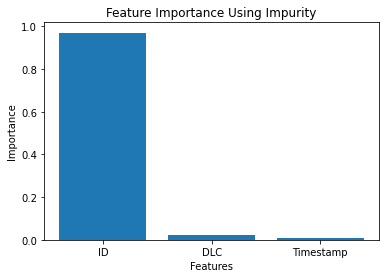

In [ ]:
X = data[['Timestamp', 'ID', 'DLC']]
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

feature_names = X.columns
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)

print(feature_importances)

plt.bar(feature_importances.index, feature_importances.values)
plt.title("Feature Importance Using Impurity")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

ID           0.170423
Timestamp    0.031527
DLC          0.020955
dtype: float64


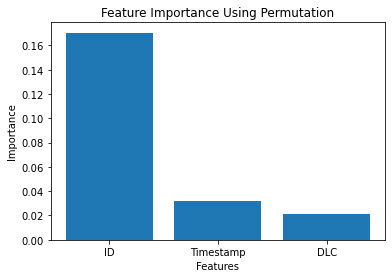

In [3]:
X = data[['Timestamp', 'ID', 'DLC']]
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

feature_names = X.columns
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
feature_importances = pd.Series(importances, index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)

print(feature_importances)

plt.bar(feature_importances.index, feature_importances.values)
plt.title("Feature Importance Using Permutation")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

PCA

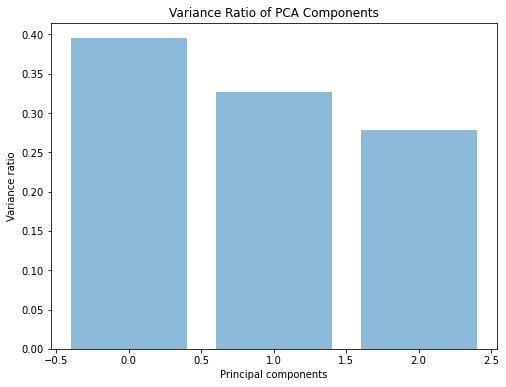

Variance Ratio:
[0.3952798  0.32681123 0.27790897]


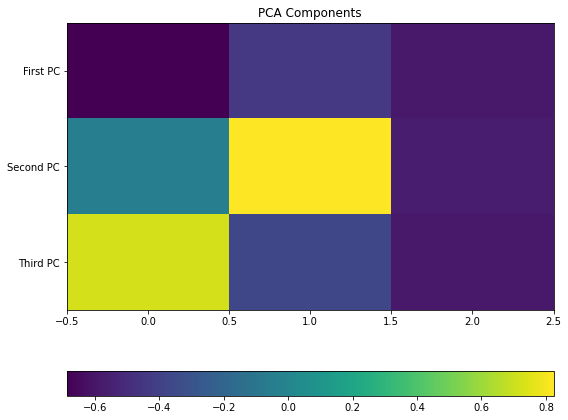

Components:
[[-0.68662113 -0.4351482  -0.58240662]
 [-0.04291282  0.82395373 -0.56502986]
 [ 0.72574784 -0.36296873 -0.58441747]]


In [8]:
X = data[['Timestamp', 'ID', 'DLC']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X_scaled)

plt.figure(figsize=(8, 6))
plt.bar(range(3), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.title('Variance Ratio of PCA Components')
plt.show()

print("Variance Ratio:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.imshow(pca.components_, cmap='viridis', aspect='auto')
plt.yticks(range(3), ['First PC', 'Second PC', 'Third PC'])
plt.colorbar(orientation='horizontal')
plt.tight_layout()
plt.title('PCA Components')
plt.show()

print("Components:")
print(pca.components_)


MÉDIA

In [11]:
# Carregando os dados
data = pd.read_csv('data\File1_normalizado.csv')

# Calculando e1
e1 = abs((0 * data['Timestamp']) + (0.6 * data['ID']) + (0.4 * data['DLC']))

# Criando um DataFrame com e1
X = pd.DataFrame(e1, columns=['e1'])
y = data["Class"]

# Criando um novo DataFrame combinando X e y
new_data = pd.concat([X, y], axis=1)

# Separando as amostras onde Class é igual a 0
amostras_class_0 = new_data[new_data['Class'] == 0]

# Separando as amostras onde Class é igual a 1
amostras_class_1 = new_data[new_data['Class'] == 1]

# Calculando a média de e1 para cada classe
media_e1_class_0 = amostras_class_0['e1'].mean()
media_e1_class_1 = amostras_class_1['e1'].mean()

# Imprimindo os resultados
print(f"Média de Free Attack: {media_e1_class_0:.4f}")
print(f"Média de Attack: {media_e1_class_1:.4f}")


Média de Free Attack: 0.5692
Média de Attack: 0.5348


TimeStamp |
Estatística t: 0.0 |
Graus de liberdade: 127324.20301551816 |
T crítico: 2.5758679184930418 |
P-valor: 1.0 |
Não rejeitamos a hipótese nula: As médias não são significativamente diferentes. |

ID |
Estatística t: 98.60904583451335 |
Graus de liberdade: 109739.07967038374 |
T crítico: 2.5758679184930418 |
P-valor: 0.0 |
Rejeitamos a hipótese nula: As médias são significativamente diferentes. |

DLC |
Estatística t: -306.66562923827814 |
Graus de liberdade: 730792.3978848093 |
T crítico: 2.5758360312593997 |
P-valor: 0.0 |
Rejeitamos a hipótese nula: As médias são significativamente diferentes. |
